Mateusz Biegański
mb385162

SAD 2020-2021

## Ex. 1

In [2]:
load("data/cancer.RData")

In [1]:
source("~/dotfiles/basic.R")

[1] "==== include successfull!"


In [24]:
dim(data.test)
dim(data.train)

[1]   270 17737

[1]   629 17738

In [4]:
data.train %>% dplyr::select(where(is.numeric)) %>% dim

[1]   629 17738

As we see, all of 17 737 predictors are **quantitive** variables.

In [229]:
dim(data.train)
predictors = data.train[,!(names(data.train) == "Y")]
Y = data.train[,(names(data.train) == "Y")]

[1]   629 17738

In [242]:
library("Rfast")
variances <- colVars(as.matrix(predictors))
variances <- cbind(colnames(predictors) %>% data.frame, as.numeric(variances))

variances.top <- variances[order(variances[,2], decreasing=TRUE) ,] %>% head(n=500)
head(variances.top)

,.,as.numeric(variances)
,<chr>,<dbl>
5897,ENSG00000129824,15.42931
12326,ENSG00000171345,15.41742
446,ENSG00000026025,13.29809
14471,ENSG00000184292,13.18422
10625,ENSG00000163993,12.95223
4881,ENSG00000120708,12.46681


In [219]:
predictors.top <- predictors[,(colnames(predictors) %in% variances.top[,1])]
predictors.top %>% head
predictors.top.cor <- predictors.top %>% cor
predictors.top.cor %>% head

,ENSG00000003436,ENSG00000006042,ENSG00000006327,ENSG00000008394,ENSG00000010278,ENSG00000011422,ENSG00000013588,ENSG00000019549,ENSG00000019582,ENSG00000021355,⋯,ENSG00000225356,ENSG00000226742,ENSG00000229645,ENSG00000229807,ENSG00000230937,ENSG00000231389,ENSG00000234745,ENSG00000240065,ENSG00000249992,ENSG00000250722
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.738679,7.292036,10.053723,12.068000,11.534013,6.432136,8.947814,4.439054,4.867821,11.417747,⋯,11.891960,8.068028,3.376597,7.870367,8.841993,6.381351,11.408045,8.210151,4.161056,8.277881
2,9.154442,7.073319,10.219469,7.206836,8.611767,6.615284,5.850255,7.536808,4.081246,5.986999,⋯,5.446633,6.401993,4.730853,2.813307,4.414529,4.397807,12.275470,9.903622,6.888816,3.979477
3,3.661229,3.375650,5.095637,10.027549,3.423976,3.448048,3.225091,3.547359,9.930930,5.105649,⋯,3.521633,3.002025,6.840491,7.923151,3.102609,12.248971,12.809778,9.748867,4.176651,3.241387
4,10.931389,6.908048,10.090588,11.218421,9.305592,7.962113,6.308959,10.636092,3.074641,8.493676,⋯,4.061878,6.690408,3.871822,2.877862,2.969621,3.437129,7.531811,6.513895,9.340064,8.874202
5,5.737307,3.806449,10.701294,10.392985,11.142862,9.023755,7.092871,6.161033,5.937077,11.471053,⋯,11.218167,9.572179,8.766891,2.817808,11.042007,8.239928,11.986676,8.627590,9.196053,3.195274
6,6.543456,3.185560,9.768617,8.567256,9.402522,10.024477,4.909429,3.291315,2.957709,6.776894,⋯,3.451492,7.451351,5.324840,2.861722,3.080982,3.301306,9.336713,6.487561,10.402078,3.114112


,ENSG00000003436,ENSG00000006042,ENSG00000006327,ENSG00000008394,ENSG00000010278,ENSG00000011422,ENSG00000013588,ENSG00000019549,ENSG00000019582,ENSG00000021355,⋯,ENSG00000225356,ENSG00000226742,ENSG00000229645,ENSG00000229807,ENSG00000230937,ENSG00000231389,ENSG00000234745,ENSG00000240065,ENSG00000249992,ENSG00000250722
ENSG00000003436,1.000000000,0.001944795,0.46214383,0.33428854,0.11059517,0.45033246,0.28553356,0.16048749,-0.2240648,0.2239910,⋯,-0.01339855,0.1233811,-0.23587563,0.0003260066,-0.056169980,-0.1738195,0.12100490,0.10256356,0.31312288,0.111480954
ENSG00000006042,0.001944795,1.000000000,0.01685548,-0.02897825,0.04982151,-0.04450551,-0.02149385,0.13181625,-0.2721343,-0.1411490,⋯,0.02992628,0.1246075,-0.09008806,0.0086184248,-0.178795789,-0.1782820,-0.29781849,-0.36611551,0.02659412,0.214294169
ENSG00000006327,0.462143825,0.016855475,1.00000000,0.37617123,0.54334606,0.64550388,0.60965202,0.42715255,-0.3899309,0.3454371,⋯,0.26617180,0.4241373,-0.48709081,-0.0458984540,0.252731162,-0.3666960,0.12801247,0.04235114,0.43740581,-0.007493103
ENSG00000008394,0.334288537,-0.028978252,0.37617123,1.00000000,0.24034522,0.33416075,0.31030416,0.05566475,-0.2145513,0.2866749,⋯,0.32063730,0.2353013,-0.25307105,-0.0499065718,0.096892608,-0.2349765,0.02813955,-0.07133926,0.15282362,0.249254255
ENSG00000010278,0.110595175,0.049821511,0.54334606,0.24034522,1.00000000,0.33710120,0.54278524,0.20296464,-0.2333856,0.2525530,⋯,0.45422669,0.4056652,-0.24097043,0.0143440810,0.366078870,-0.2398330,0.02732095,-0.01428085,0.10882034,0.104891858
ENSG00000011422,0.450332460,-0.044505510,0.64550388,0.33416075,0.33710120,1.00000000,0.47224437,0.33270242,-0.2533967,0.3560032,⋯,0.04256098,0.1671709,-0.23067050,-0.0456453213,0.003327218,-0.2281409,0.24735959,0.17288210,0.54105011,-0.133323707


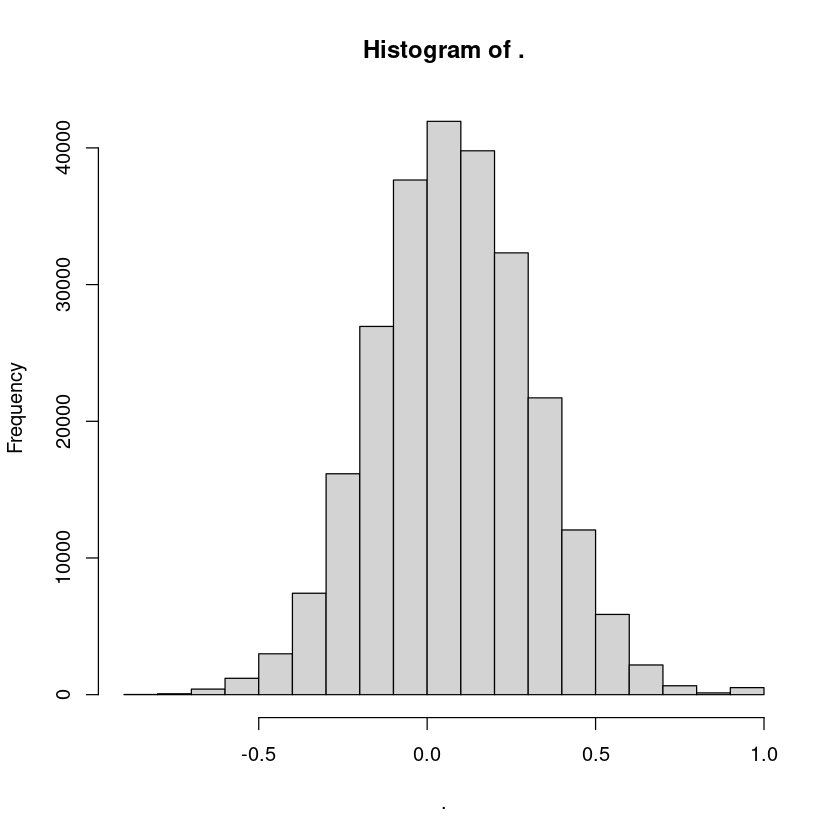

In [243]:
sapply(predictors.top.cor, mean) %>% hist


Call:  cv.glmnet(x = predictors.top %>% as.matrix, y = Y %>% as.matrix,      alpha = 0.7) 

Measure: Mean-Squared Error 

     Lambda Index Measure       SE Nonzero
min 0.01575    29 0.04775 0.003249      66
1se 0.03315    21 0.05067 0.003203      28


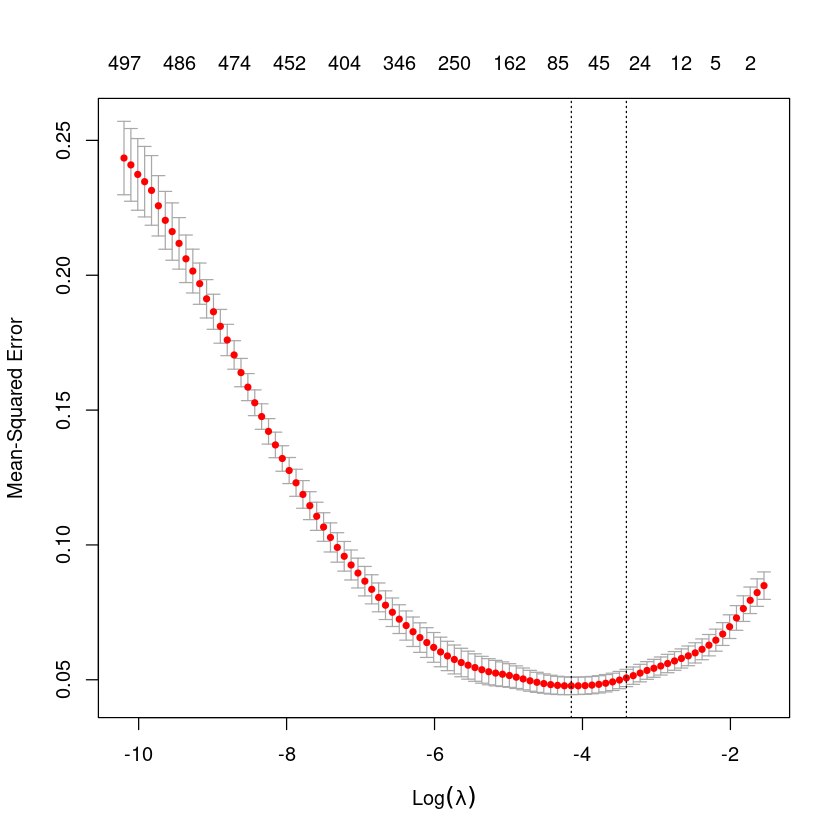

In [251]:
# cbind(Y, predictors.top)
# for alpha=1 mi 0.05
cvfit <- cv.glmnet(predictors.top %>% as.matrix, Y %>% as.matrix, alpha=.7)
plot(cvfit)
print(cvfit)


Call:  cv.glmnet(x = predictors.top %>% as.matrix, y = Y %>% as.matrix,      alpha = 0.99) 

Measure: Mean-Squared Error 

     Lambda Index Measure       SE Nonzero
min 0.01341    27 0.04776 0.002447      49
1se 0.02136    22 0.04969 0.002327      33


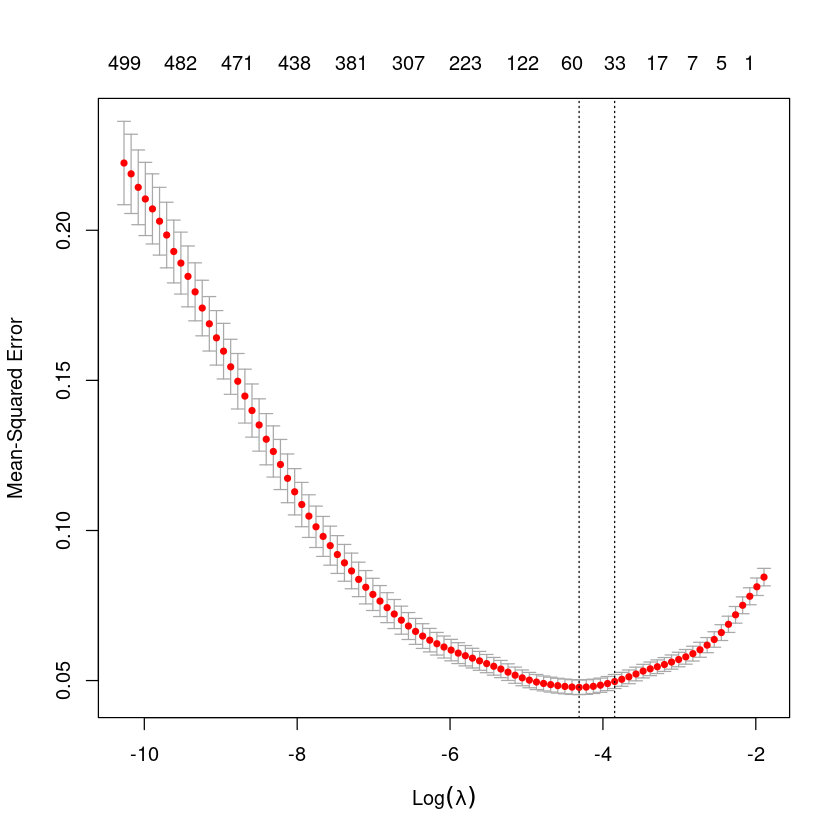

In [239]:
cvfit <- cv.glmnet(predictors.top %>% as.matrix, Y %>% as.matrix, alpha=.99)
plot(cvfit)
print(cvfit)


Call:  cv.glmnet(x = predictors.top %>% as.matrix, y = Y %>% as.matrix,      alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure       SE Nonzero
min 0.4248    64 0.04724 0.003127     500
1se 1.7150    49 0.05011 0.003040     500


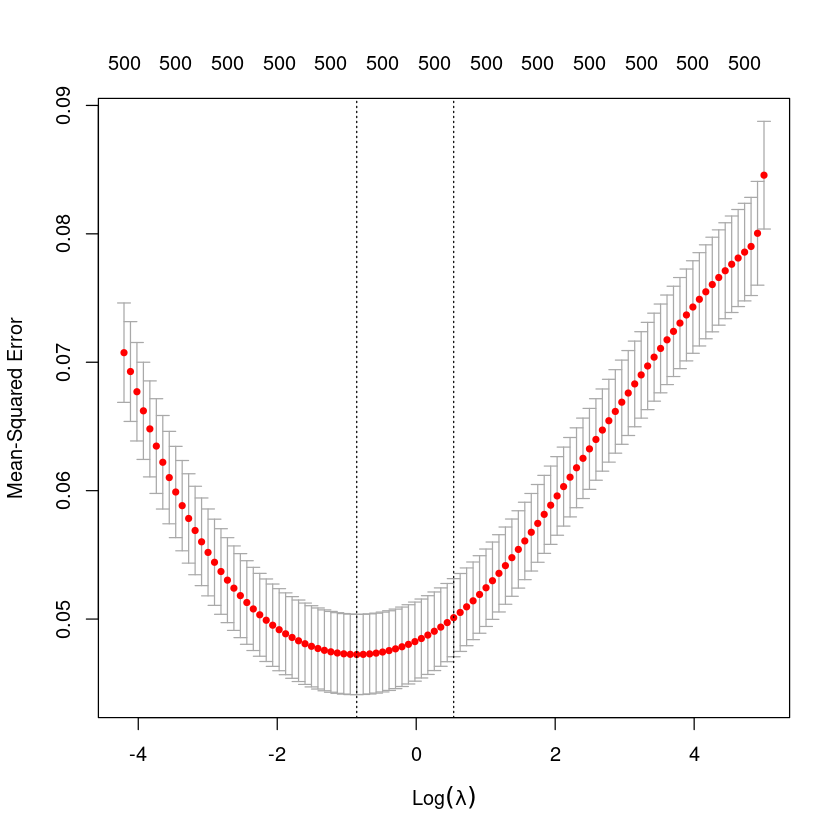

In [240]:
cvfit <- cv.glmnet(predictors.top %>% as.matrix, Y %>% as.matrix, alpha=0)
plot(cvfit)
print(cvfit)


Call:  cv.glmnet(x = predictors.top %>% as.matrix, y = Y %>% as.matrix,      alpha = 1) 

Measure: Mean-Squared Error 

     Lambda Index Measure       SE Nonzero
min 0.01102    29 0.04809 0.002390      65
1se 0.01927    23 0.04993 0.001833      35


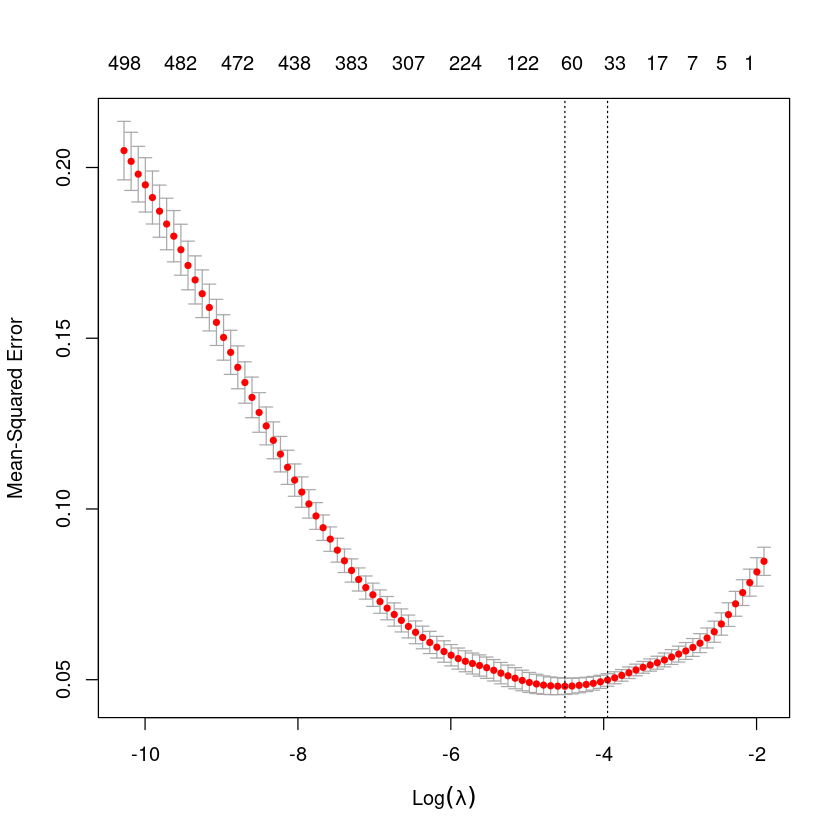

In [241]:
cvfit <- cv.glmnet(predictors.top %>% as.matrix, Y %>% as.matrix, alpha=1)
plot(cvfit)
print(cvfit)

Let's look at the correlation plot of 10 (not 500 for visibility purposes) arbitrary-selected variables.

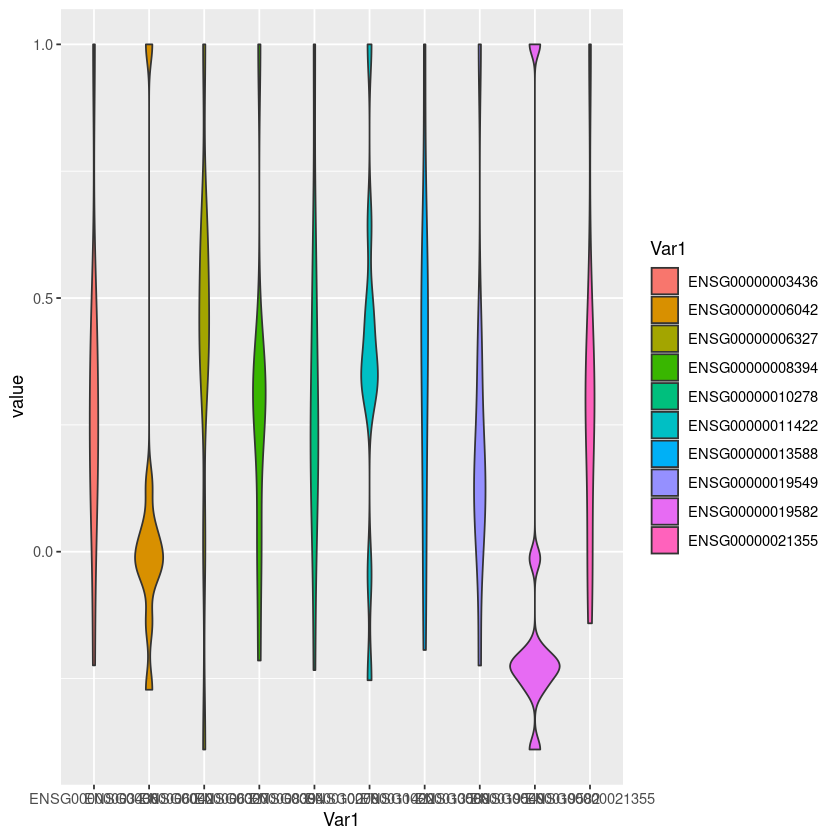

In [221]:
library(ggplot2)

num=10
plot_df <- reshape2::melt(predictors.top.cor[1:num, 1:num])
ggplot(data = plot_df) + geom_violin(aes(Var1, value, fill = Var1))

## Ex. 2

### Elastic net

to standard linear regression model penalty there is an additional factor added:

$\lambda$*($\alpha$* $\lVert\beta\rVert _1$ + (1-$\alpha$)*$\lVert\beta\rVert _2 ^2$ )

It is sort of mix of Lasso and Ridge regression model - it can easily fix highly correlated variables issue, by clustering and either emphasizing or suppressing whole groups.

* Estimated parameters:
    * $\lambda$
* Tuning parameters:
    * $\alpha$

## Ex. 3

Let's observe, that variables with zero or near-zero variance aren't very meaningful for us - it's hard to explain response variable in terms of linear combination of near-constant variables. Instead let's focus on topN (N=500) variables, in terms of variance.

## Ex. 4

In [253]:
elastic_fn = function(alpha) {
    cvfit <- cv.glmnet(predictors.top %>% as.matrix, Y %>% as.matrix, alpha=alpha)
    plot(cvfit)
    print(cvfit)
}


Call:  cv.glmnet(x = predictors.top %>% as.matrix, y = Y %>% as.matrix,      alpha = alpha) 

Measure: Mean-Squared Error 

     Lambda Index Measure       SE Nonzero
min 0.01728    28 0.04772 0.001955      59
1se 0.02752    23 0.04910 0.001640      35

Call:  cv.glmnet(x = predictors.top %>% as.matrix, y = Y %>% as.matrix,      alpha = alpha) 

Measure: Mean-Squared Error 

     Lambda Index Measure       SE Nonzero
min 0.01222    28 0.04810 0.002573      60
1se 0.02344    21 0.05066 0.002603      28

Call:  cv.glmnet(x = predictors.top %>% as.matrix, y = Y %>% as.matrix,      alpha = alpha) 

Measure: Mean-Squared Error 

     Lambda Index Measure       SE Nonzero
min 0.01005    30 0.04786 0.002307      73
1se 0.02114    22 0.05002 0.002363      33

Call:  cv.glmnet(x = predictors.top %>% as.matrix, y = Y %>% as.matrix,      alpha = alpha) 

Measure: Mean-Squared Error 

    Lambda Index Measure       SE Nonzero
min 0.3871    65 0.04637 0.003049     500
1se 1.5626    50 0.04917 0.00

Lambda,"0.01728420, 0.02752134","0.01222115, 0.02343908","0.01004475, 0.02114324","0.3870775, 1.5626384"
Index,"28, 23","28, 21","30, 22","65, 50"
Measure,"0.04772074, 0.04910191","0.04810413, 0.05066430","0.04785861, 0.05001807","0.04637390, 0.04916926"
SE,"0.001955328, 0.001640061","0.002572903, 0.002603147","0.002306998, 0.002363149","0.003049307, 0.002756937"
Nonzero,"59, 35","60, 28","73, 33","500, 500"


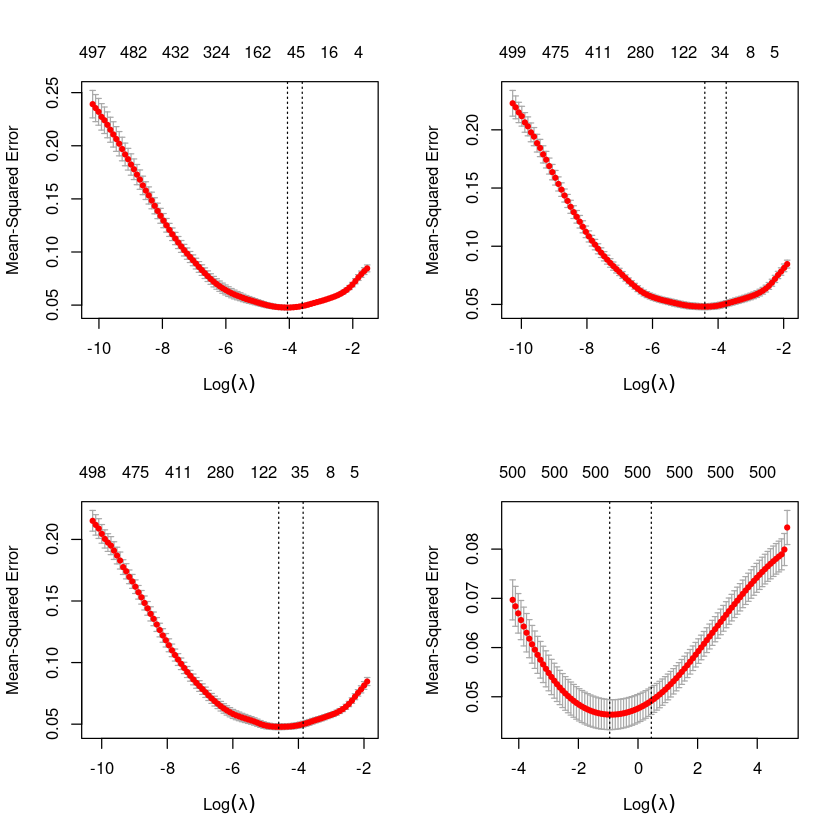

In [258]:
tuning_alpha = c(.7, .99, 1.0, 0.0)

par(mfrow=c(2,2))
sapply(tuning_alpha, elastic_fn)

| $\alpha$ | 1se $\lambda$ | 1se error | non-zero |
|----------|---------------|-----------|----------|
|    0.7   |      0.033    |   0.051   |    28    |
|   0.99   |      0.021    |   0.050   |    33    |
|   1.00   |      0.019    |   0.050   |   35     |
|   0.00   |      1.72     |   0.050   |   500    |


Elastic net on our data yields predictions with quality ~95% (using only $\leq$ 35 parameters). 

### Random forest

In [265]:
library("randomForest")
rv.fit <- rfcv(predictors.top, Y, cv.fold=10)

In [272]:
# with(rv.fit, plot(n.var, error.cv))
methods(class=class(rv.fit))
rv.fit

 [1] all.equal     as_tibble     as.data.frame coerce        common_by    
 [6] dimnames<-    ggplot_add    melt          Ops           relist       
[11] scale_type    select        type.convert  within       
see '?methods' for accessing help and source code

$n.var
[1] 500 250 125  62  31  16   8   4   1

$error.cv
       500        250        125         62         31         16          8 
0.05033512 0.04990113 0.04941536 0.04929882 0.04962016 0.05005054 0.05081960 
         4          1 
0.05846279 0.09243367 

$predicted
$predicted$`500`
  [1] 0.5918781 0.6865955 0.9486557 0.5949304 0.4698270 0.6380911 0.7116974
  [8] 0.6395272 0.7118794 0.8092527 0.6922319 0.5770392 0.7155541 0.7578918
 [15] 0.6856447 0.8662064 0.5309976 0.8805902 0.7667847 0.5168030 0.6142641
 [22] 0.6471687 0.6311870 0.4667073 0.8957094 0.6196490 0.6622781 0.6679883
 [29] 0.9363516 0.6084808 0.8755386 0.5564969 0.5308609 0.6535781 0.6531059
 [36] 0.8616994 0.6791637 0.6527748 0.7242120 0.5077341 0.5209437 0.8673757
 [43] 0.4991619 0.8522123 0.5011197 0.7225758 0.9122295 0.5899417 0.9291855
 [50] 0.8433513 0.9347944 0.6196104 0.5303692 0.6600650 0.8584441 0.6586150
 [57] 0.6078921 0.8408475 0.5053224 0.8646284 0.7009334 0.5984189 0.9079502
 [64] 0.6129738 0.5235302 0.5132796 0.5910414 0.5174191 0.9015315 0.6944131
 [71] 0.7039054 0.5825283 0.6190851 0.5023490 0.4544340 0.4762407 0.9274673
 [78] 0.6347785 0.7416605 0.6636047 0.7889544 0.5922733 0.3632075 0.3718391
 [85] 0.7632715 0.7085619 0.7969393 0.8623295 0.8176222 0.6287709 0.9172323
 [92] 0.6577524 0.6839352 0.4715326 0.8225682 0.6344431 0.9561577 0.4868191
 [99] 0.5505971 0.9120170 0.9051726 0.6308731 0.6975457 0.6777067 0.5723380
[106] 0.6562750 0.6654131 0.6181062 0.5738870 0.5646332 0.4827403 0.6093810
[113] 0.6395837 0.8979363 0.9147624 0.9120931 0.8862034 0.2601082 0.6442256
[120] 0.6842587 0.6523854 0.6041636 0.5043701 0.6383174 0.5609213 0.8159962
[127] 0.9209305 0.2573808 0.7931585 0.5787778 0.7110724 0.5531888 0.4923074
[134] 0.7626374 0.6729055 0.3982983 0.7733778 0.7022593 0.5302406 0.7049452
[141] 0.8981305 0.8879608 0.5410561 0.3507676 0.8749108 0.6956283 0.6964713
[148] 0.8529950 0.5134957 0.8944044 0.8827164 0.5198968 0.6955495 0.7566774
[155] 0.5391272 0.7765989 0.9109951 0.5022785 0.8590880 0.8401789 0.7127779
[162] 0.5391898 0.6769844 0.8375703 0.4736155 0.9546903 0.7269944 0.8602575
[169] 0.9007433 0.6029451 0.7151870 0.6612176 0.7053672 0.7798672 0.6861024
[176] 0.7093378 0.6589178 0.5482285 0.8587635 0.7396244 0.8202008 0.7049157
[183] 0.4872147 0.5518743 0.3841430 0.5306194 0.6334973 0.7666812 0.7199108
[190] 0.4896643 0.6564756 0.7439140 0.6329872 0.6017922 0.7850144 0.5139254
[197] 0.5262460 0.6499489 0.7149237 0.8662793 0.6136556 0.6481861 0.6208019
[204] 0.5121383 0.9317765 0.5900103 0.7410242 0.9014685 0.8962185 0.5572269
[211] 0.8388750 0.6802330 0.3544933 0.6175442 0.5193588 0.6145641 0.9087386
[218] 0.2869266 0.7385949 0.6251326 0.5163697 0.5729321 0.5773364 0.6990813
[225] 0.9293650 0.7456177 0.6959693 0.4680292 0.6471630 0.6605512 0.7568964
[232] 0.7101507 0.6250348 0.4917453 0.9031137 0.8281131 0.4285420 0.6037411
[239] 0.6821951 0.6138117 0.5734002 0.5570483 0.4992448 0.5863519 0.8767826
[246] 0.6905075 0.5458047 0.9465625 0.6587429 0.5864772 0.9496753 0.7866762
[253] 0.8086447 0.6226971 0.8477544 0.4859921 0.6604795 0.6592701 0.5436892
[260] 0.7511137 0.8202914 0.9319287 0.4993229 0.6526452 0.8223174 0.6893496
[267] 0.5641224 0.5881275 0.7400800 0.6659682 0.9316380 0.6585294 0.5692112
[274] 0.8554320 0.6796099 0.6516484 0.7769327 0.6820920 0.6576993 0.5205460
[281] 0.6076114 0.8972497 0.6589907 0.5177069 0.8574787 0.8735417 0.6539758
[288] 0.9574385 0.4900715 0.5116152 0.9261012 0.5498945 0.9338609 0.3913226
[295] 0.6013134 0.6444530 0.5718965 0.5543301 0.9329258 0.6555388 0.6486668
[302] 0.5186318 0.7321273 0.3076144 0.6455668 0.3688583 0.6466731 0.4423764
[309] 0.6579332 0.6143061 0.8336171 0.8663671 0.9244948 0.8912554 0.5212557
[316] 0.9444228 0.8027133 0.3511887 0.8093273 0.8144780 0.7676286 0.7198364
[323] 0.7483057 0.8368824 0.4795294 0.5098435 0.5658731 0.5868729 0.5515595
[330] 0.7626413 0.5435240 0.6758912 0.6885197 0.3961468 0.6156943 0.8991524
[337] 0.9141378 0.7131804 0.7214307 0.7515217 0.3046439 0.87381